# Movie Analysis

> Hypothetical Situation: Microsoft wants to start a movie film company.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

In [28]:
df_bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
df_bom_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Dropped 'foreign_gross' column due to large number of nans:

In [29]:
df_bom_gross.drop(columns=['foreign_gross'], inplace=True)

Sorted df_bom_gross by 'domestic_gross' column to find top performing films:

In [30]:
df_bom_gross.sort_values(by='domestic_gross',ascending=False).head()

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012


# Load Data

In [31]:
df_title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [33]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Dropped 'runtime_minutes' column due to large number of nans:

In [32]:
df_title_basics.drop(columns=['runtime_minutes'], inplace=True)

Converted genres column from object to string:

In [33]:
df_title_basics['genres'] = df_title_basics.genres.astype(str)

In [34]:
df_title_basics.rename(columns={'primary_title':'title'}, inplace=True)

Function to create a new dataframe of a column for each genre from the genre column:

In [35]:
def make_genre_columns(dataframe, genre_col_name='genres', drop_genres_col=True):
    '''Creates a new DataFrame of a column for each genres from the genres column. 
    Input:
        dataframe: Original DataFrame
        genres_col_name: Name of the column of genres (values look like "Action,Adventure")
        drop_genres_col: Flag to drop the original genres column
    Returns:
        A copy of the original DataFrame with a column for each genres from the genres column
    '''
    ## Get list of unique genres
    # Join all the (unique) genres values into one big string
    list_all_genres = ','.join(dataframe[genre_col_name].unique())
    # Get a set of all unique genres (no duplicates)
    unique_genres = set(list_all_genres.split(','))
    ## Create new columns with the genres & populate with 0 & 1
    # Make a safe copy
    new_dataframe = dataframe.copy(deep=True)
    for genre in unique_genres:
        new_dataframe[genre] = new_dataframe[genre_col_name].map(lambda val: 1 if genre in val else 0)
    # Drop the unused `genre_col_name` column
    if drop_genres_col:
        new_dataframe = new_dataframe.drop([genre_col_name], axis=1)
    return new_dataframe

In [9]:
list_all_genres = ','.join(df_title_basics['genres'].unique())
unique_genres = set(list_all_genres.split(','))
unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 'nan'}

# Load Data

In [36]:
df_title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
df_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Merged column 'tconst' between df_title_basics and df_title_ratings:

In [37]:
merged_basics_and_ratings = pd.merge(df_title_basics, df_title_ratings, on=['tconst'], how='inner')
merged_basics_and_ratings.sort_values(by='averagerating',ascending=False).head()

,tconst,title,original_title,start_year,genres,averagerating,numvotes
51109,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,Documentary,10.0,7
65944,tt7259300,Calamity Kevin,Calamity Kevin,2019,"Adventure,Comedy",10.0,6
71577,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,Documentary,10.0,5
73616,tt9715646,Renegade,Renegade,2019,Documentary,10.0,20
65755,tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,"Documentary,History",10.0,6


In [77]:
merged_basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Sorted new merged_basics_and_ratings dataframe by top 50 number of votes, creating new df4, then sort by average rating where numvotes column is greater than 50,000 creating new df5:

In [38]:
df4 = merged_basics_and_ratings.sort_values(by='numvotes',ascending=False).head(50)
df5 = df4[df4['numvotes'] > 50000].sort_values(by='averagerating',ascending=False)

In [55]:
df5.head()

,tconst,title,original_title,start_year,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
280,tt0816692,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
26774,tt2582802,Whiplash,Whiplash,2014,"Drama,Music",8.5,616916
43419,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926
7125,tt1675434,The Intouchables,Intouchables,2011,"Biography,Comedy,Drama",8.5,677343


In [39]:
joined_df = pd.merge(df5, df_bom_gross, on=['title'], how='inner')
joined_df

,tconst,title,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross,year
0,tt1375666,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,WB,292600000.0,2010
1,tt0816692,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,Par.,188000000.0,2014
2,tt2582802,Whiplash,Whiplash,2014,"Drama,Music",8.5,616916,SPC,13100000.0,2014
3,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018
4,tt1853728,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405,Wein.,162800000.0,2012
5,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,WB,448100000.0,2012
6,tt0435761,Toy Story 3,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218,BV,415000000.0,2010
7,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358,Par.,116900000.0,2013
8,tt2024544,12 Years a Slave,12 Years a Slave,2013,"Biography,Drama,History",8.1,577301,FoxS,56700000.0,2013
9,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,"Action,Adventure,Animation",8.1,611299,P/DW,217600000.0,2010


In [64]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          45 non-null     object 
 1   title           45 non-null     object 
 2   original_title  45 non-null     object 
 3   start_year      45 non-null     int64  
 4   genres          45 non-null     object 
 5   averagerating   45 non-null     float64
 6   numvotes        45 non-null     int64  
 7   studio          45 non-null     object 
 8   domestic_gross  45 non-null     float64
 9   year            45 non-null     int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ KB


Bar graph showing genres with highest average rating (minimum 50,000 votes):

<AxesSubplot:xlabel='genres'>

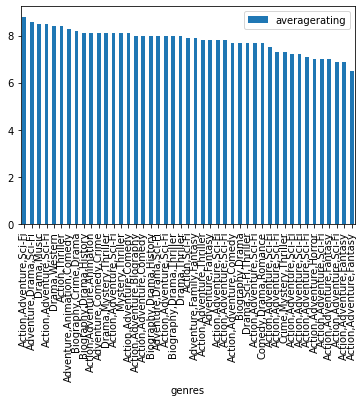

In [41]:
joined_df.plot(kind='bar', x='genres', y='averagerating')

<AxesSubplot:xlabel='genres'>

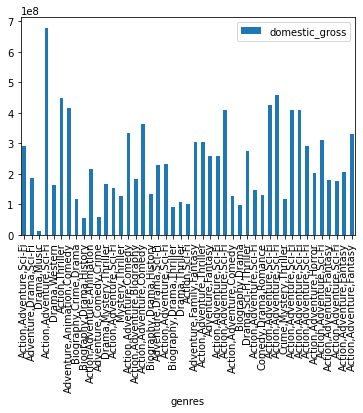

In [15]:
joined_df.plot(kind='bar', x='genres', y='domestic_gross')

# Load Data

In [40]:
df_movies = pd.read_csv('data/tmdb.movies.csv.gz')
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [90]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [41]:
df_movies.drop(columns=['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'release_date', 'title'], inplace=True)

In [42]:
df_movies.rename(columns={'original_title':'title'}, inplace=True)

In [94]:
df_movies.head()

,title,popularity,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788
1,How to Train Your Dragon,28.734,7.7,7610
2,Iron Man 2,28.515,6.8,12368
3,Toy Story,28.005,7.9,10174
4,Inception,27.920,8.3,22186


# Load Data

In [76]:
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [38]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [77]:
df_budgets['worldwide_gross'] = df_budgets.worldwide_gross.replace('[\$,]','', regex=True).astype(int)
df_budgets['production_budget'] = df_budgets.production_budget.replace('[\$,]','', regex=True).astype(int)
df_budgets['domestic_gross'] = df_budgets.domestic_gross.replace('[\$,]','', regex=True).astype(int)

In [72]:
df_budgets.drop(columns=['id', 'release_date'], inplace=True)

In [80]:
df_budgets.rename(columns={'movie':'title'}, inplace=True)

In [78]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [81]:
df_movie_budgets = pd.merge(df_budgets, df_movies, on=['title'], how='inner')
df_movie_budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,26.526,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,30.579,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,34.953,6.2,7510


In [82]:
df_6 = pd.merge(df_movie_budgets, joined_df, on=['title'], how='inner')
df_6

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross_y,year
0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,2015
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018
2,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,26.220,7.7,13933,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,WB,448100000.0,2012
3,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",7.8,583507,BV,408100000.0,2016
4,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,28.088,5.8,11991,tt2975590,Batman v Superman: Dawn of Justice,2016,"Action,Adventure,Fantasy",6.5,576909,WB,330400000.0,2016
5,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,26.939,7.2,12076,tt0903624,The Hobbit: An Unexpected Journey,2012,"Adventure,Family,Fantasy",7.9,719629,WB (NL),303000000.0,2012
6,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,258366855,960366855,21.275,7.6,7739,tt1170358,The Hobbit: The Desolation of Smaug,2013,"Adventure,Fantasy",7.8,565563,WB (NL),258399999.0,2013
7,29,"Jun 14, 2013",Man of Steel,225000000,291045518,667999518,27.667,6.5,9758,tt0770828,Man of Steel,2013,"Action,Adventure,Sci-Fi",7.1,647288,WB,291000000.0,2013
8,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,24.445,7.7,8340,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218,BV,415000000.0,2010
9,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,32.093,6.9,14155,tt1300854,Iron Man Three,2013,"Action,Adventure,Sci-Fi",7.2,692794,BV,409000000.0,2013


In [83]:
df_7 = df_6.drop_duplicates(subset=['title'])

In [84]:
df_7.reset_index(drop=True)

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross_y,year
0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,2015
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018
2,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,26.220,7.7,13933,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,WB,448100000.0,2012
3,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",7.8,583507,BV,408100000.0,2016
4,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,28.088,5.8,11991,tt2975590,Batman v Superman: Dawn of Justice,2016,"Action,Adventure,Fantasy",6.5,576909,WB,330400000.0,2016
5,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,26.939,7.2,12076,tt0903624,The Hobbit: An Unexpected Journey,2012,"Adventure,Family,Fantasy",7.9,719629,WB (NL),303000000.0,2012
6,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,258366855,960366855,21.275,7.6,7739,tt1170358,The Hobbit: The Desolation of Smaug,2013,"Adventure,Fantasy",7.8,565563,WB (NL),258399999.0,2013
7,29,"Jun 14, 2013",Man of Steel,225000000,291045518,667999518,27.667,6.5,9758,tt0770828,Man of Steel,2013,"Action,Adventure,Sci-Fi",7.1,647288,WB,291000000.0,2013
8,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,24.445,7.7,8340,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218,BV,415000000.0,2010
9,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,32.093,6.9,14155,tt1300854,Iron Man Three,2013,"Action,Adventure,Sci-Fi",7.2,692794,BV,409000000.0,2013


In [85]:
df_new = make_genre_columns(df_7, "genres")
df_new

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,...,Adventure,Thriller,Fantasy,Animation,Comedy,Horror,Family,Biography,Mystery,Sci-Fi
0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,...,1,0,0,0,0,0,0,0,0,1
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,...,1,0,0,0,0,0,0,0,0,1
2,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,26.220,7.7,13933,tt1345836,...,0,1,0,0,0,0,0,0,0,0
3,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,...,1,0,0,0,0,0,0,0,0,1
4,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,28.088,5.8,11991,tt2975590,...,1,0,1,0,0,0,0,0,0,0
5,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,26.939,7.2,12076,tt0903624,...,1,0,1,0,0,0,1,0,0,0
6,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,258366855,960366855,21.275,7.6,7739,tt1170358,...,1,0,1,0,0,0,0,0,0,0
7,29,"Jun 14, 2013",Man of Steel,225000000,291045518,667999518,27.667,6.5,9758,tt0770828,...,1,0,0,0,0,0,0,0,0,1
8,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,24.445,7.7,8340,tt0435761,...,1,0,0,1,1,0,0,0,0,0
9,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,32.093,6.9,14155,tt1300854,...,1,0,0,0,0,0,0,0,0,1


In [86]:
df_new['profit'] = df_new['worldwide_gross'] - df_new['production_budget']

In [87]:
df_new

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,...,Thriller,Fantasy,Animation,Comedy,Horror,Family,Biography,Mystery,Sci-Fi,profit
0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,...,0,0,0,0,0,0,0,0,1,1072413963
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,...,0,0,0,0,0,0,0,0,1,1748134200
2,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,26.220,7.7,13933,tt1345836,...,1,0,0,0,0,0,0,0,0,809439099
3,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,...,0,0,0,0,0,0,0,0,1,890069413
4,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,28.088,5.8,11991,tt2975590,...,0,1,0,0,0,0,0,0,0,617500281
5,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,26.939,7.2,12076,tt0903624,...,0,1,0,0,0,1,0,0,0,767003568
6,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,258366855,960366855,21.275,7.6,7739,tt1170358,...,0,1,0,0,0,0,0,0,0,710366855
7,29,"Jun 14, 2013",Man of Steel,225000000,291045518,667999518,27.667,6.5,9758,tt0770828,...,0,0,0,0,0,0,0,0,1,442999518
8,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,24.445,7.7,8340,tt0435761,...,0,0,1,1,0,0,0,0,0,868879522
9,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,32.093,6.9,14155,tt1300854,...,0,0,0,0,0,0,0,0,1,1015392272


In [88]:
df_new = df_new.sort_values(by='profit',ascending=False)
df_new.head()

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,...,Thriller,Fantasy,Animation,Comedy,Horror,Family,Biography,Mystery,Sci-Fi,profit
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,...,0,0,0,0,0,0,0,0,1,1748134200
0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,...,0,0,0,0,0,0,0,0,1,1072413963
9,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,32.093,6.9,14155,tt1300854,...,0,0,0,0,0,0,0,0,1,1015392272
10,52,"Nov 8, 2012",Skyfall,200000000,304360277,1110526981,19.270,7.1,10441,tt1074638,...,1,0,0,0,0,0,0,0,0,910526981
3,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,...,0,0,0,0,0,0,0,0,1,890069413


In [95]:
sns.barplot(x='genres',y='worldwide_gross',data=df_new)
plt.show()

ValueError: Could not interpret input 'genres'

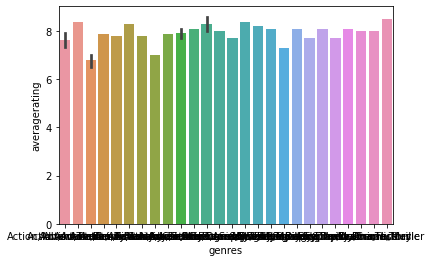

In [66]:
sns.barplot(x='genres',y='averagerating',data=df_7)
plt.show()

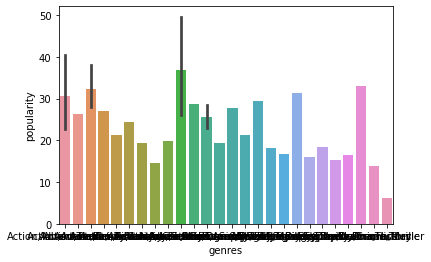

In [68]:
sns.barplot(x='genres',y='popularity',data=df_7)
plt.show()

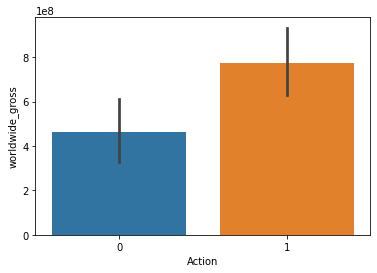

In [78]:
sns.barplot(x='Action',y='worldwide_gross',data=df_new)
plt.show()

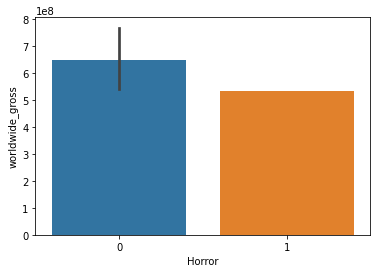

In [94]:
sns.barplot(x='Horror',y='worldwide_gross',data=df_new)
plt.show()